# Homework Lecture 20

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)


signal gets faster and faster as t increases
look online to see if we can get the same expected figure
gravitational wave  chirp google
now the x axis is time and y is frequency so this needs to be 
converted

For this assignment, I used the Morelt wavelet.

### Step 1

Let's first plot the original signal

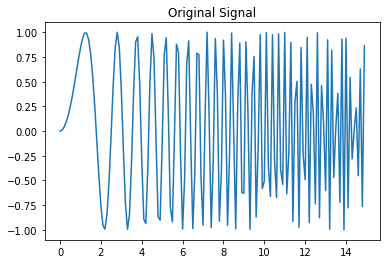

In [1]:
import matplotlib.pyplot as plt
from numpy import *

def func(t):
    if(0<t and t<15):
        y=sin(t**2)
    else:
        y=0
    return y
        
t=arange(0,15,0.1)
y=zeros(len(t))
for idx in range(len(t)):
    y[idx]=func(t[idx])

plt.plot(t,y)
plt.title('Original Signal')
plt.show()

### Step 2

Wavelet Transform

The wavelet transform of a time signal y(t) is defined as
\begin{equation}
Y(s,\tau)=\int_{-\infty}^{\infty}dt \psi^*_{s,\tau}(t)y(t)
\end{equation}
with s=2$\pi/\omega$

The standard way to generate a family of wavelet basis starts with 
$\phi(t)$, called a mother function or an analyzing function. Note that
t is real. We can use this function to generate daughter wavelets. 

For example, the mother wavelet
\begin{equation}
\Psi(t)=sin(8*t)e^{-t^2/2}
\end{equation}
We can scale, translate, and normalize this mother wavelet
\begin{equation}
\psi_{s,\tau}(t)\equiv \frac{1}{\sqrt{s}}\Psi(\frac{t-\tau}{s})=\frac{1}{\sqrt{s}}sin\left[\frac{8(t-\tau)}{s}\right]e^{-(t-\tau)^2/2s^2}
\end{equation}

Using daughter wavelets, the wave transform and its inverse transform are
\begin{eqnarray}
Y(s,\tau)=\frac{1}{\sqrt{s}}\int_{-\infty}^{\infty}dt \Psi^*(\frac{t-\tau}{s})y(t)\quad (wavelet \, transform)\\
y(t)=\frac{1}{C}\int_{-\infty}^{\infty}d\tau \int_{0}^{\infty}ds \frac{\psi_{s,\tau}(t)}{s^{2}}Y(s,\tau)\quad  (Inverse \, Transform)\\
\end{eqnarray}
where C depends on the wavelet used.  The wavelet transform got a function of
the time scale s (frequency 2$\pi$/s) and window location $\tau$.

The general requirements for a mother wavelet $\Psi$ are
* $\Psi(t)$ is real
* $\Psi(t)$ oscillates around zero such that its average is zero
* $\Psi(t)$ is local.
* The trasforms of low powers of t vanish
\begin{equation}
\int_{-\infty}^{\infty}t^0\Psi(t)dt=\int_{-\infty}^{\infty}t^1\Psi(t)dt=...=\int_{-\infty}^{\infty}t^{p-1}\Psi(t)dt=0
\end{equation}

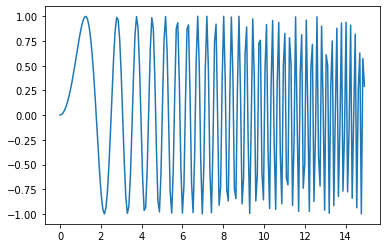

In [2]:
ns=50
ntau=200
dstep=2./ns
sar=arange(0.001,2.001,dstep)
dtaustep=15./ntau
tauar=arange(0.,15.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=200
dtstep=15./nt
tar=arange(0.,15.,dtstep)

def morlet(t,sigma):
    '''
    Morlet mother function
    '''
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():   
    '''
    function to do wavlet transformation
    '''
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            for idext in range(nt): 
               ystau[idexs,idextau] = 1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet()
plt.plot(tar,yarr)
plt.show()

### Step 3

Reconstruct the original signal

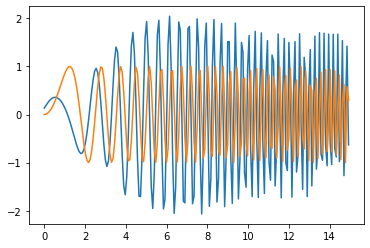

This does not look good. Maybe there is a lot of noise.


In [3]:
yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
plt.plot(tar,yarr2.imag)
plt.plot(tar,yarr)
plt.show()

print('This does not look good. Maybe there is a lot of noise.')

### Imaginary part

We can do the same thing as before using the imaginary part.
Reconstructing the signal actually works better this way.

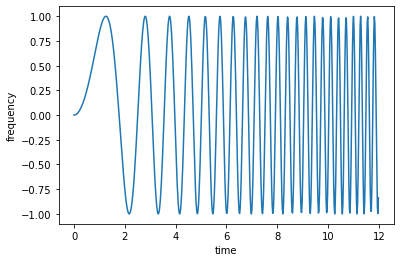

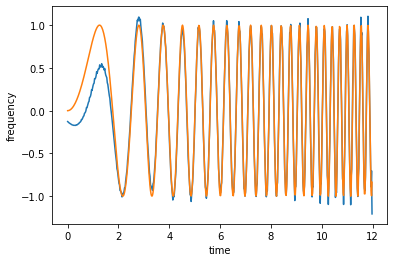

In [4]:
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func1(t):
    return(sin(2.*pi*t))

def morlet(t,sigma):
#    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    psi=sin(2.*pi*t)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./sqrt(sar[idexs])*sum(conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep

wavelet()

plt.plot(tar,yarr)
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()
plt.show()  



#Reconstruct original signal

yarr2=zeros(nt,complex)
def invwavelet(yarr2):     
    for idexs in range(ns):
        for idextau in range(ntau):
            yarr2+=1./sqrt(sar[idexs])/sar[idexs]**2.*morlet((tar-tauar[idextau])/sar[idexs],1.)*ystau[idexs,idextau]*dstep*dtaustep

invwavelet(yarr2)
plt.plot(tar,yarr2.real*2.2)
plt.plot(tar,yarr)
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

Let's see how it looks if we use the code from the book

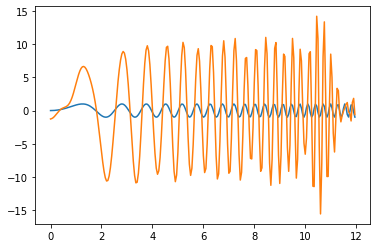

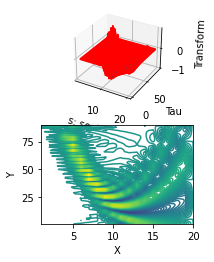

In [5]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# CWT.py  Continuous Wavelet TF. Based on program by Zlatko Dimcovic 
												
import matplotlib.pylab as p;
from mpl_toolkits.mplot3d import Axes3D ;
from numpy import *


iT =  0.0;          fT =  12.0;         W = fT - iT;
N =  240;           h =  W/N
noPtsSig =  N;      noS =  20;          noTau =  90;
iTau =  0.;         iS =  0.1;          tau =  iTau;        s =  iS                
            
# Need *very* small s steps for high frequency;
dTau =  W/noTau;    dS =  (W/iS)**(1./noS);
maxY =  0.001;      sig =  zeros((noPtsSig), float)              # Signal
      

    
def signal(noPtsSig, y):                                # Signal function
    tar=array([])
    yyar=array([])
    t = 0.0;     hs = W/noPtsSig;     t1 = 15.;    t2 = 4.*W/6.
    for i in range(0, noPtsSig):  
        if  t >= iT  and t <=  t1:  y[i] =  sin(t*t)
        else: 
            y[i] = 0
        yy=y[i]
        tar=append(tar,t)
        yyar=append(yyar,yy)
        t += hs  
    p.plot(tar,yyar)
        
signal(noPtsSig, sig)                                       # Form signal
Yn =  zeros( (noS+1, noTau+1), float)                       # Transform

def morlet(t, s, tau):                                      # Mother  
     T =  (t - tau)/s
     return sin(8*T) * exp( - T*T/2. )
	
def transform(s, tau, sig):                            # Find wavelet TF
    integral = 0.
    t = iT;                                                     
    for i in range(0, len(sig) ):
         t += h
         integral += sig[i]*morlet(t, s, tau)*h
    return integral / sqrt(s)
          
def invTransform(t, Yn):                                # Compute inverse
    s = iS                                                    # Transform
    tau = iTau                             
    recSig_t = 0                 
    for i in range (0, noS):
        s *= dS                                              # Scale graph
        tau = iTau     
        for j in range (0, noTau):
            tau += dTau                 
            recSig_t += dTau*dS *(s**(-1.5))* Yn[i,j] * morlet(t,s,tau)
    return recSig_t

for i in range( 0, noS):
    s *= dS                                                 # Scaling
    tau = iT
    for j in range(0, noTau):
         tau += dTau                                      # Translate
         Yn[i, j] = transform(s, tau, sig)
          
for i in range( 0, noS):
    for j in range( 0, noTau):
        if Yn[i, j] > maxY or Yn[i, j] < - 1 *maxY :
            maxY = abs( Yn[i, j] )                      # Find max Y       
tau =  iT
s =  iS
    
for i in range( 0, noS):
     s *= dS                             
     for j in range( 0, noTau):
         tau +=   dTau                                        # Transform
         Yn[i, j] = Yn[i, j]/maxY
     tau = iT
# Inverse TF
recSigData =  "recSig.dat"                   
recSig =  zeros(len(sig) )                                   
t =  0.0;
kco = 0;            j = 0;              Yinv =  Yn         
xxar=array([])
yyar2=array([])
for rs in range(0, len(recSig) ):                     
    recSig[rs] = invTransform(t, Yinv)          # Find input signal
    xx=rs/20
    yy=4.6*recSig[rs]
    xxar=append(xxar,xx)
    yyar2=append(yyar2,yy)
    t += h 
    if kco %24 == 0:
        j += 1                          
    kco += 1    
p.plot(xxar,yyar2)
x = list(range(1, noS + 1))                             
y = list(range(1, noTau + 1))                                         
X,Y = p.meshgrid(x, y)                                    

def functz(Yn):                                # Transform function
    z = Yn[X, Y]    
    return z
                
Z = functz(Yn)                                               
fig = p.figure()                                              
#ax = Axes3D(fig)      
ax = fig.add_subplot(2,2,1,projection='3d')
ax.plot_surface(X, Y, Z)  
ax.plot_wireframe(X, Y, Z, color = 'r')          
ax.set_xlabel('s: scale')                                         
ax.set_ylabel('Tau')
ax.set_zlabel('Transform')
ax = fig.add_subplot(2,2,3)
levels=p.arange(Z.min(),Z.max(),(Z.max() - Z.min())/100.)
CS=p.contour(x,y,Z, levels=levels)
p.xlabel('X')
p.ylabel('Y')
p.show()